In [1]:
# setting up the development environment
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from sklearn.model_selection import train_test_split

#Ensure plots show inline
%matplotlib inline

In [2]:
# Load dataset from github repo
url = "https://raw.githubusercontent.com/Rodney-Jr/Thrive_Internship_ML_A/refs/heads/main/customer_support_tickets_dirty.csv"
df = pd.read_csv(url)

df.head() #inspecting first few rows(head()) of the datatset.

,text,label,ticket_id,agent_name
0,Where can I find API rate limits documentation?,Othr,1000,Dana
1,Can I migrate data from Freshdesk?,Othr,1001,Bob
2,Cannot update billing address; page keeps relo...,billing,1002,Charlie
3,Looking for a product roadmap or upcoming feat...,other,1003,Dana
4,Dark mode toggled but UI stays light.,Tech-support,1004,Alice


In [3]:
df.shape #checking the number of rows and columns

(520, 4)

In [4]:
df.info() #getting the basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        495 non-null    object
 1   label       495 non-null    object
 2   ticket_id   520 non-null    int64 
 3   agent_name  520 non-null    object
dtypes: int64(1), object(3)
memory usage: 16.4+ KB


In [5]:
#checking for missing or duplicated data
df.isnull().sum() #checking for missing values
df.duplicated().sum() #checking for duplicated values

np.int64(0)

In [6]:
df.drop_duplicates(inplace=True) #dropping the duplicated values found
df =df.dropna() #dropping the missing values found

In [7]:
df.describe() #generates descriptive statistics of the dataframe

,ticket_id
count,472.000000
mean,1259.786017
std,149.518061
min,1000.000000
25%,1133.750000
50%,1259.500000
75%,1387.500000
max,1519.000000


In [8]:
df.describe(include='object') #generates descriptive statistics of the dataframe

,text,label,agent_name
count,472,472,472
unique,173,16,4
top,Do you offer discounts for students or NGOs?,Accnt,Alice
freq,16,41,132


In [9]:
df['label'].value_counts() #checking the distribution of the target variable
df['agent_name'].value_counts() #checking the distribution of the agent_name

,count
agent_name,
Alice,132
Bob,120
Charlie,115
Dana,105


In [10]:
df['label'] = df['label'].str.lower().replace({'othr': 'other'}) #fix inconsistent labels replace"othr" with "other"
df['label'] = df['label'].str.lower().replace({'OTHER': 'other'}) #fix inconsistent labels replace"OTHER" with "other"

In [11]:
df['text'] = df['text'].str.strip() #trim text and remove whitespaces

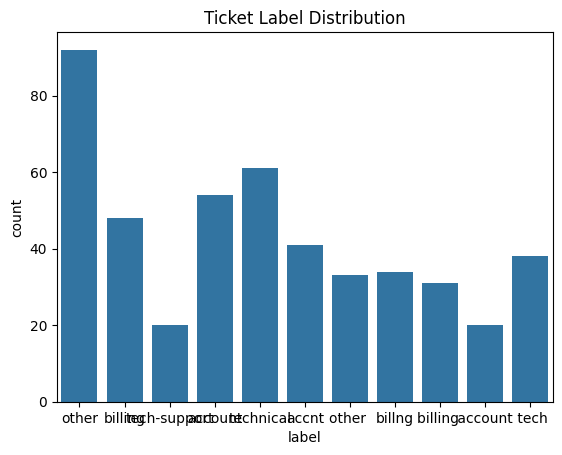

In [12]:
sns.countplot(data=df, x='label') #plot the distribution of the target variable
plt.title("Ticket Label Distribution")
plt.show()

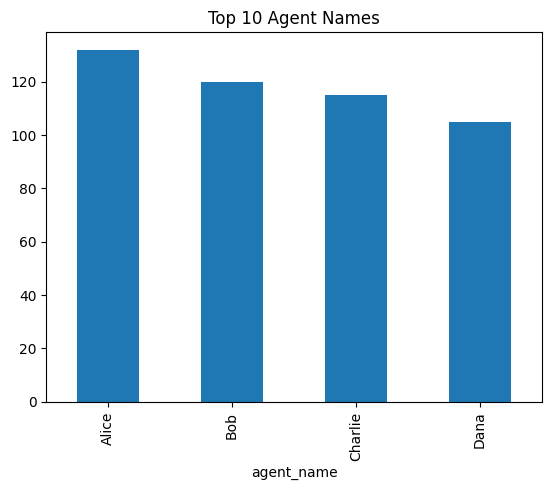

In [13]:
df['agent_name'].value_counts().head(10).plot(kind='bar') #plot the distribution of the agent_name
plt.title("Top 10 Agent Names")
plt.show()

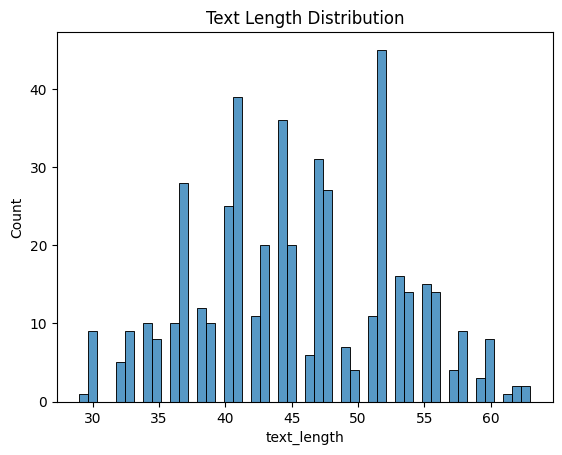

In [14]:
df['text_length'] = df['text'].apply(len) #create a new column with the length of the text
sns.histplot(data=df, x='text_length', bins=50) #plot the distribution of the text length
plt.title("Text Length Distribution")
plt.show()

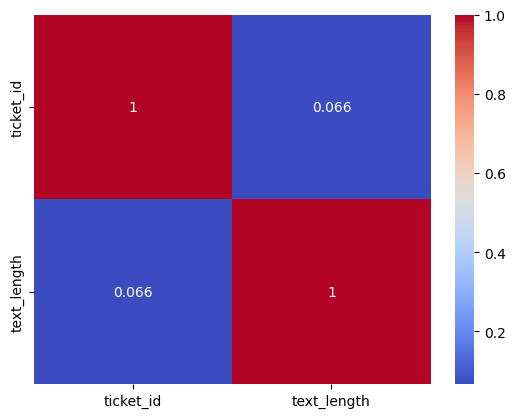

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm') #create a heatmap of the correlation matrix
plt.show()

In [16]:
df.to_csv('customer_support_tickets_cleaned.csv', index=False) #save the cleaned dataset to a new csv file
print("Cleaned dataset saved as 'customer_support_tickets_cleaned.csv")

Cleaned dataset saved as 'customer_support_tickets_cleaned.csv
